In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os

In [3]:
df_animals = pd.read_csv(r"C:\Users\hp\Desktop\ExcelR\Assignments Folder\KNN\Zoo.csv",encoding='ascii')

In [4]:
df_animals.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


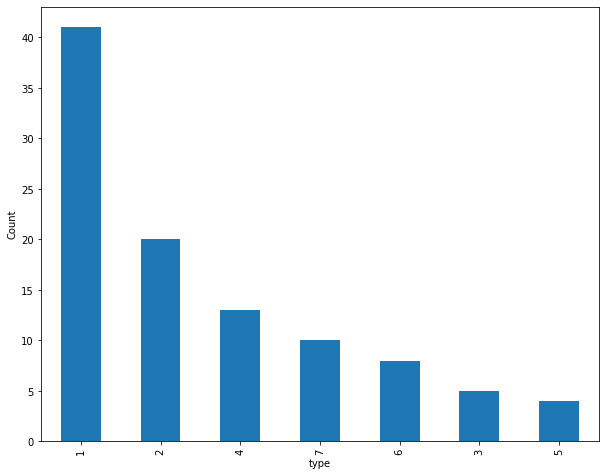

In [6]:
plt.figure(figsize=(10,8));
df_animals.type.value_counts().plot(kind="bar");
plt.xlabel('type');
plt.ylabel("Count");
plt.plot();

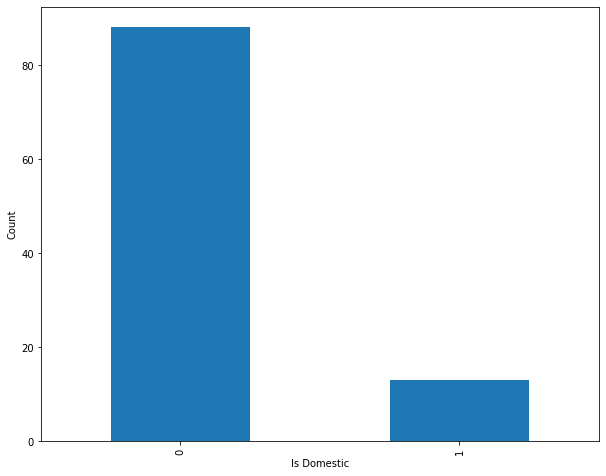

In [7]:
plt.figure(figsize=(10,8));
df_animals.domestic.value_counts().plot(kind="bar");
plt.xlabel('Is Domestic');
plt.ylabel("Count");
plt.plot();

In [ ]:
# So we can see mostly animals are not domestic.

In [8]:
pd.crosstab(df_animals.type, df_animals.domestic)

domestic,0,1
type,,
1,33,8
2,17,3
3,5,0
4,12,1
5,4,0
6,7,1
7,10,0


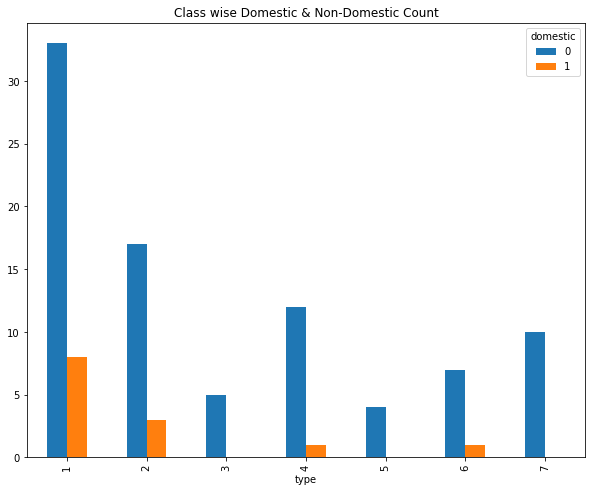

In [9]:
# Lets see species wise domestic and non-domestic animals
pd.crosstab(df_animals.type, df_animals.domestic).plot(kind="bar", figsize=(10, 8), title="Class wise Domestic & Non-Domestic Count");
plt.plot();

In [10]:
# We can see mammals class has most number of domestic animals, which is a kind of true if you will see around
# you. Mostly domestic animals are mammals like dogs, cats, cows, pigs.

In [11]:
# Lets see how many animals provides us milk
df_animals.milk.value_counts()

0    60
1    41
Name: milk, dtype: int64

In [12]:
# So there are 41 animals in the list which provides us milk. Lets see to which category they belongs

In [13]:
pd.crosstab(df_animals.type, df_animals.milk)

milk,0,1
type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


In [14]:
# So we can observer here only mammals provides milk, which is really a scientific true. 
# that mean our data exploration is going good till now.. CONGRATS !!!

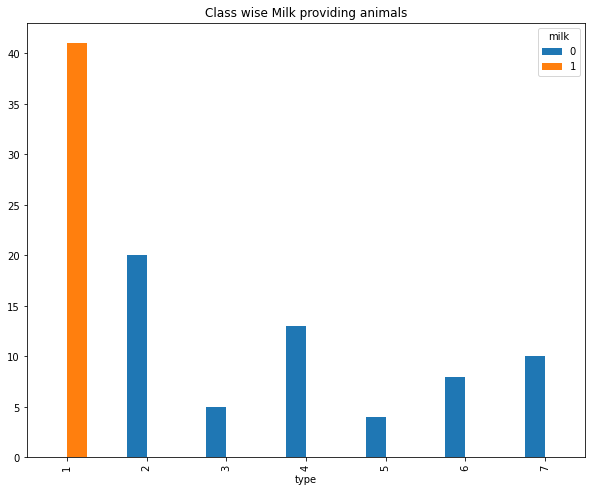

In [15]:
pd.crosstab(df_animals.type, df_animals.milk).plot(kind="bar", title="Class wise Milk providing animals", figsize=(10, 8));

In [16]:
# We can see mammal bar is orange (milk = 1), this shows all the mammals in our list provides milk.
# And no othere class animals gives us milk, Actually our plot really makes sense.
# lets find is it correct.
df_animals[(df_animals.milk==1)].shape[0]

41

In [17]:
df_animals[df_animals.type == 1].shape[0]

41

In [18]:
# So yes we can see milk animals and mammals have equal numbers and all animals who provide milk belong to 
# mammal category. 

In [19]:
# Lets see how many animals live under water. i.e aquatic
# lets find out all the aquatic animals.
df_animals.aquatic.value_counts() # only 36 aquatic animals are there.
# lets see there class.

0    65
1    36
Name: aquatic, dtype: int64

In [21]:
df_animals[df_animals.aquatic==1].type.value_counts()

4    13
7     6
1     6
2     6
5     4
3     1
Name: type, dtype: int64

In [22]:
# We can see mostly aquatic animals are fish means class 4, but wait we have few animals with 
# class 7, 2, 1, 5, 3
# and still they have fins. 
# Lets find out is it a wrong data or what?

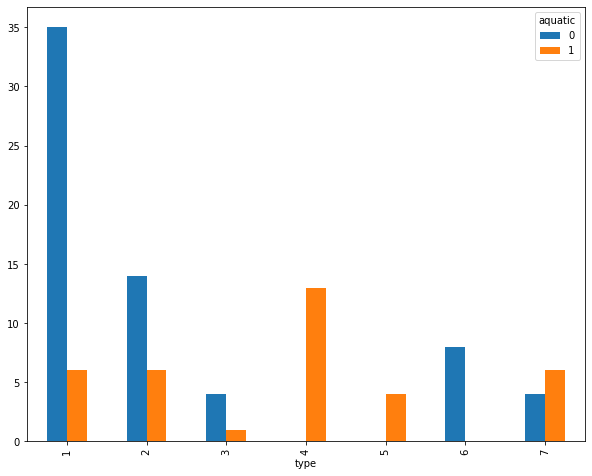

In [23]:
# Lets plot category wise animals having fins
pd.crosstab(df_animals.type, df_animals.aquatic).plot(kind="bar", figsize=(10, 8));

In [24]:
# What about venomous?
df_animals.venomous.value_counts()

0    93
1     8
Name: venomous, dtype: int64

In [25]:
# In our dataset we have 8 venomous. Lets see their class
pd.crosstab(df_animals.type, df_animals.venomous)

venomous,0,1
type,,
1,41,0
2,20,0
3,3,2
4,12,1
5,3,1
6,6,2
7,8,2


<AxesSubplot:xlabel='type'>

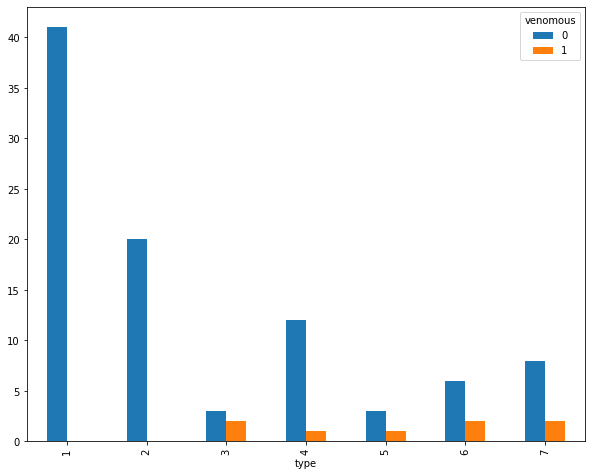

In [26]:
# As per our data we have 2 repltiles which are venomous and , 1 fish and other class types
pd.crosstab(df_animals.type, df_animals.venomous).plot(kind="bar", figsize=(10, 8))

In [ ]:
# From above plot, we know that no mammals and birds are venomous. So thank god you can hug them.

In [ ]:
#Create Feature and target matrix

In [27]:
df_animals.shape

(101, 18)

In [28]:
#X = df_animals.iloc[:, 1: 17].values
X=df_animals.loc[:, ["milk", "backbone", "toothed", "venomous", "domestic", "aquatic"]].values

In [29]:
y = df_animals.iloc[:, 17].values

In [30]:
y.shape

(101,)

In [31]:
X.shape

(101, 6)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
clf = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2) 
# n_neighbors: number of neighbors. Default is 5
# metric="minkowski", p=2: will calculate distance as eucledian distance formula

In [36]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
y_pred = clf.predict(X_test)

In [38]:
y_pred # here you can see our model predict the class of the animal for the test data.

array([4, 4, 4, 1, 1, 1, 2, 4, 1, 1, 7, 1, 2, 6, 4, 6, 1, 6, 2, 4, 2, 3,
       1, 2, 1, 1], dtype=int64)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [40]:
print("Accuracy of KNN Regression:",accuracy_score(y_test, y_pred))

Accuracy of KNN Regression: 0.9230769230769231


In [41]:
# So we can see we have an accuracy of 92% which is very good

In [42]:
#Compare with Logistic regression
from sklearn.linear_model import LogisticRegression

In [43]:
clf_log = LogisticRegression(random_state=0)

In [44]:
clf_log.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [45]:
y_pred_log = clf_log.predict(X_test)

In [46]:
print("Accuracy of Logistic Regression Classifier:",accuracy_score(y_test, y_pred_log))

Accuracy of Logistic Regression Classifier: 0.9230769230769231


In [1]:
#write a loop for the multiple k values and plot the accuracies to select the optimum k value

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
%matplotlib inline

df = pd.read_csv(r"C:\Users\hp\Desktop\ExcelR\Assignments Folder\2KNN\Zoo.csv",encoding='ascii')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [10]:
X = df.drop(['animal name'], axis = 1)
y = df['animal name']
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
k = 4  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=4 is 0.047619047619047616


Minimum error:- 0.9523809523809523 at K = 0


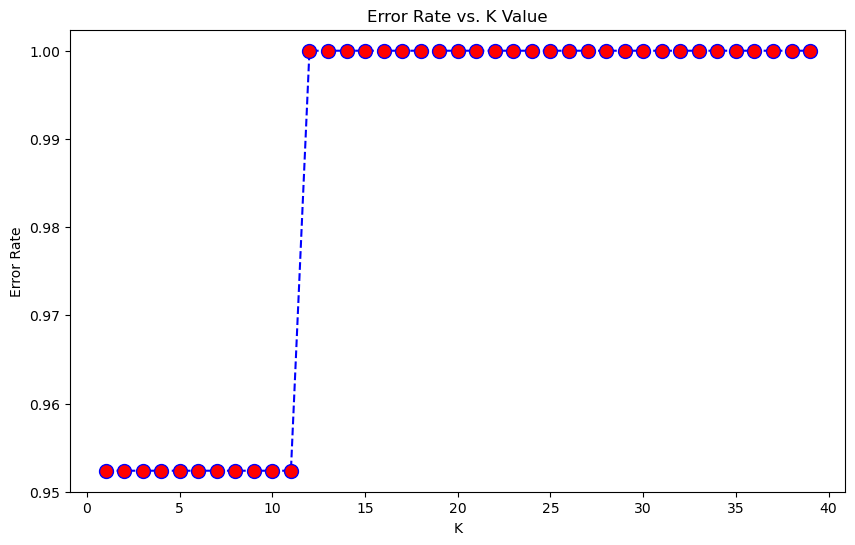

In [11]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.047619047619047616 at K = 0


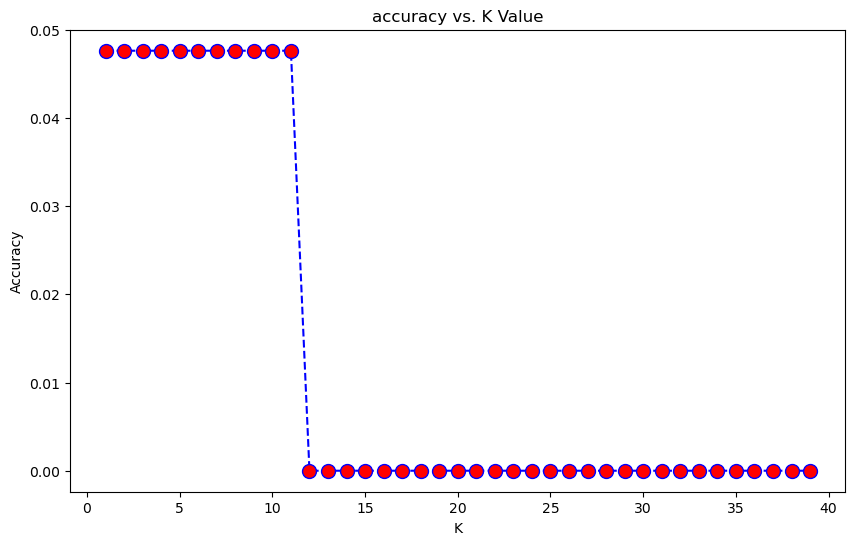

In [12]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))